In [1]:
!python --version

Python 3.10.13


In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json
import joblib
import gc

pd.set_option('display.max_columns', None)

## Exploratory Data Analysis (EDA)

In [3]:
data = pd.read_json("transactions.txt", lines=True)
data.shape

(786363, 29)

In [4]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [6]:
target_col = "isFraud"
data[target_col].value_counts(dropna=False)

isFraud
False    773946
True      12417
Name: count, dtype: int64

In [7]:
data[target_col].value_counts(dropna=False, normalize=True)

isFraud
False    0.98421
True     0.01579
Name: proportion, dtype: float64

In [8]:
data.replace("", np.nan, inplace=True)

In [9]:
data.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

#### Columns with all missing values are dropped

In [10]:
cols_to_exclude = ["echoBuffer", "merchantCity", "merchantState", "merchantZip", "posOnPremises", "recurringAuthInd"]
len(cols_to_exclude)

6

In [11]:
data.drop(cols_to_exclude, axis=1, inplace=True)
data.shape

(786363, 23)

In [12]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


#### Duplicate columns

In [13]:
all(data["accountNumber"] == data["customerId"])

True

In [14]:
data.drop("accountNumber", axis=1, inplace=True)
data.shape

(786363, 22)

In [15]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


#### Summary statistics

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customerId                786363 non-null  int64  
 1   creditLimit               786363 non-null  int64  
 2   availableMoney            786363 non-null  float64
 3   transactionDateTime       786363 non-null  object 
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  object 
 6   acqCountry                781801 non-null  object 
 7   merchantCountryCode       785639 non-null  object 
 8   posEntryMode              782309 non-null  object 
 9   posConditionCode          785954 non-null  object 
 10  merchantCategoryCode      786363 non-null  object 
 11  currentExpDate            786363 non-null  object 
 12  accountOpenDate           786363 non-null  object 
 13  dateOfLastAddressChange   786363 non-null  o

In [17]:
data.isna().sum()

customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [199]:
data.nunique(dropna=False)

customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [18]:
data["creditLimit"].value_counts(dropna=False)

creditLimit
5000     201863
15000    139307
7500      97913
2500      75429
20000     68629
10000     56889
50000     48781
1000      36430
250       34025
500       27097
Name: count, dtype: int64

In [19]:
cols_num = ["transactionAmount", "availableMoney", "currentBalance"]

In [20]:
data[["transactionAmount", "availableMoney", "currentBalance"]].describe()

,transactionAmount,availableMoney,currentBalance
count,786363.000000,786363.000000,786363.000000
mean,136.985791,6250.725369,4508.739089
std,147.725569,8880.783989,6457.442068
min,0.000000,-1005.630000,0.000000
25%,33.650000,1077.420000,689.910000
50%,87.900000,3184.860000,2451.760000
75%,191.480000,7500.000000,5291.095000
max,2011.540000,50000.000000,47498.810000


In [52]:
data["transactionDateTime"].min(), data["transactionDateTime"].max()

('2016-01-01T00:01:02', '2016-12-30T23:59:45')

In [53]:
data["transactionDateTime"] = pd.to_datetime(data["transactionDateTime"])

In [54]:
data["transactionDateTime"].min(), data["transactionDateTime"].max()

(Timestamp('2016-01-01 00:01:02'), Timestamp('2016-12-30 23:59:45'))

### Duplicate transactions

In [55]:
attrs = ["customerId", "accountOpenDate", "dateOfLastAddressChange",
         "merchantName", "acqCountry", "merchantCountryCode", "merchantCategoryCode",
         "currentExpDate", "cardCVV", "enteredCVV", "cardLast4Digits", "cardPresent", "expirationDateKeyInMatch",
         "posEntryMode", "posConditionCode",
         "transactionAmount"]
df_duplicates = data[data.duplicated(subset=attrs, keep=False)]
df_duplicates = df_duplicates.sort_values(attrs+ ["transactionDateTime"])
df_duplicates

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
541963,100088067,50000,49834.20,2016-11-20 07:57:05,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,PURCHASE,165.80,True,False,False
541964,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,REVERSAL,188.12,True,False,False
541919,100088067,50000,50000.00,2016-05-05 22:47:50,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False
541926,100088067,50000,49695.85,2016-06-05 22:10:41,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,304.15,False,False,False
541929,100088067,50000,50000.00,2016-07-05 22:22:49,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108110,999389635,5000,4900.94,2016-08-22 11:42:48,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,99.06,False,False,False
108112,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,346.30,False,False,False
108113,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,325.92,False,False,False
108114,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,305.54,False,False,False


In [56]:
df_duplicates["acqCountry"].isna().sum()

451

In [57]:
df_duplicates["transactionType"].value_counts(dropna=False)

transactionType
PURCHASE                75550
REVERSAL                15999
ADDRESS_VERIFICATION      919
NaN                        31
Name: count, dtype: int64

In [58]:
data["transactionType"].value_counts(dropna=False)

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
NaN                        698
Name: count, dtype: int64

In [59]:
data[data["transactionType"]=="REVERSAL"]["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.983401
True     0.016599
Name: proportion, dtype: float64

In [262]:
20303 - 15999

4304

#### Reversal

In [60]:
df_id_amount_reversal = \
df_duplicates[df_duplicates["transactionType"]=="REVERSAL"][attrs]

df_id_amount_reversal

,customerId,accountOpenDate,dateOfLastAddressChange,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,cardPresent,expirationDateKeyInMatch,posEntryMode,posConditionCode,transactionAmount
541964,100088067,2014-01-09,2014-01-09,AMC #79863,US,US,entertainment,06/2020,546,546,4615,True,False,09,01,22.32
87920,100328049,2014-01-07,2014-01-07,Lyft,US,US,rideshare,05/2027,206,206,2941,False,False,09,08,43.74
87936,100328049,2014-01-07,2014-01-07,McDonalds #423357,US,US,fastfood,10/2027,206,206,2941,True,False,02,08,284.97
151499,100737756,2015-06-21,2015-06-21,34th BBQ #436606,US,US,food,05/2026,463,463,4317,True,False,05,01,93.67
151541,100737756,2015-06-21,2015-06-21,Best Bistro #262998,US,US,food,07/2021,463,463,4317,True,False,05,01,501.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545581,999258704,2015-12-22,2015-12-22,gap.com,US,US,online_retail,05/2025,708,708,3757,False,False,09,01,72.93
670038,999283629,2015-11-08,2016-03-09,Delta Airlines,US,US,airline,08/2021,919,919,4157,False,False,05,01,247.40
670109,999283629,2015-11-08,2016-03-09,Franks Sandwitch Bar,US,US,food,03/2030,489,489,3016,True,False,09,01,150.58
670052,999283629,2015-11-08,2016-03-09,Lyft,US,US,rideshare,06/2029,489,489,3016,False,False,05,08,96.56


In [61]:
15999 / data.shape[0]

0.020345565597567537

In [62]:
reversal_indices = df_id_amount_reversal.index
reversal_indices

Index([541964,  87920,  87936, 151499, 151541, 151595, 474250, 474247,   3080,
         3052,
       ...
       569793, 569751, 545536, 545572, 545555, 545581, 670038, 670109, 670052,
       670091],
      dtype='int64', length=15999)

In [63]:
df_id_amount_reversal[attrs].drop_duplicates().shape

(15999, 16)

In [64]:
df_id_amount_reversal["transactionAmount"].sum()

2322554.07

In [65]:
2322554.07 / data["transactionAmount"].sum()

0.02156091764891927

In [66]:
df_id_amount_reversal2 = pd.merge(df_id_amount_reversal, 
         df_duplicates,
        how="inner",
        on=attrs)
df_id_amount_reversal2

,customerId,accountOpenDate,dateOfLastAddressChange,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,cardPresent,expirationDateKeyInMatch,posEntryMode,posConditionCode,transactionAmount,creditLimit,availableMoney,transactionDateTime,transactionType,currentBalance,isFraud
0,100088067,2014-01-09,2014-01-09,AMC #79863,US,US,entertainment,06/2020,546,546,4615,True,False,09,01,22.32,50000,49834.20,2016-11-20 07:57:05,PURCHASE,165.80,False
1,100088067,2014-01-09,2014-01-09,AMC #79863,US,US,entertainment,06/2020,546,546,4615,True,False,09,01,22.32,50000,49811.88,2016-11-20 08:00:04,REVERSAL,188.12,False
2,100328049,2014-01-07,2014-01-07,Lyft,US,US,rideshare,05/2027,206,206,2941,False,False,09,08,43.74,5000,4648.84,2016-01-15 20:34:35,PURCHASE,351.16,False
3,100328049,2014-01-07,2014-01-07,Lyft,US,US,rideshare,05/2027,206,206,2941,False,False,09,08,43.74,5000,4605.10,2016-01-15 20:36:18,REVERSAL,394.90,False
4,100328049,2014-01-07,2014-01-07,McDonalds #423357,US,US,fastfood,10/2027,206,206,2941,True,False,02,08,284.97,5000,4077.06,2016-03-24 22:57:15,PURCHASE,922.94,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32191,999283629,2015-11-08,2016-03-09,Franks Sandwitch Bar,US,US,food,03/2030,489,489,3016,True,False,09,01,150.58,2500,2034.10,2016-11-19 18:48:08,REVERSAL,465.90,False
32192,999283629,2015-11-08,2016-03-09,Lyft,US,US,rideshare,06/2029,489,489,3016,False,False,05,08,96.56,2500,2500.00,2016-06-01 23:34:21,PURCHASE,0.00,False
32193,999283629,2015-11-08,2016-03-09,Lyft,US,US,rideshare,06/2029,489,489,3016,False,False,05,08,96.56,2500,2403.44,2016-06-07 18:32:39,REVERSAL,96.56,False
32194,999283629,2015-11-08,2016-03-09,apple.com,US,US,online_retail,06/2030,489,487,3016,False,False,05,01,407.23,2500,1775.48,2016-09-15 06:35:31,PURCHASE,724.52,False


In [67]:
15999*2

31998

In [68]:
df_id_amount_reversal2[attrs].drop_duplicates().shape

(15999, 16)

In [69]:
df_id_amount_reversal2.groupby(attrs).size()

customerId  accountOpenDate  dateOfLastAddressChange  merchantName          acqCountry  merchantCountryCode  merchantCategoryCode  currentExpDate  cardCVV  enteredCVV  cardLast4Digits  cardPresent  expirationDateKeyInMatch  posEntryMode  posConditionCode  transactionAmount
100088067   2014-01-09       2014-01-09               AMC #79863            US          US                   entertainment         06/2020         546      546         4615             True         False                     09            01                22.32                2
100328049   2014-01-07       2014-01-07               Lyft                  US          US                   rideshare             05/2027         206      206         2941             False        False                     09            08                43.74                2
                                                      McDonalds #423357     US          US                   fastfood              10/2027         206      206         

In [70]:
df_id_amount_reversal2.groupby(attrs).size().values

array([2, 2, 2, ..., 2, 2, 2])

In [71]:
df_id_amount_reversal2[(df_id_amount_reversal2["customerId"]==999283629)]

,customerId,accountOpenDate,dateOfLastAddressChange,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,cardPresent,expirationDateKeyInMatch,posEntryMode,posConditionCode,transactionAmount,creditLimit,availableMoney,transactionDateTime,transactionType,currentBalance,isFraud
32187,999283629,2015-11-08,2016-03-09,Delta Airlines,US,US,airline,08/2021,919,919,4157,False,False,05,01,247.40,2500,1616.30,2016-04-09 12:56:43,PURCHASE,883.70,False
32188,999283629,2015-11-08,2016-03-09,Delta Airlines,US,US,airline,08/2021,919,919,4157,False,False,05,01,247.40,2500,1368.90,2016-04-09 12:56:52,PURCHASE,1131.10,False
32189,999283629,2015-11-08,2016-03-09,Delta Airlines,US,US,airline,08/2021,919,919,4157,False,False,05,01,247.40,2500,2500.00,2016-05-01 05:42:19,REVERSAL,0.00,False
32190,999283629,2015-11-08,2016-03-09,Franks Sandwitch Bar,US,US,food,03/2030,489,489,3016,True,False,09,01,150.58,2500,2184.68,2016-11-14 23:10:41,PURCHASE,315.32,False
32191,999283629,2015-11-08,2016-03-09,Franks Sandwitch Bar,US,US,food,03/2030,489,489,3016,True,False,09,01,150.58,2500,2034.10,2016-11-19 18:48:08,REVERSAL,465.90,False
32192,999283629,2015-11-08,2016-03-09,Lyft,US,US,rideshare,06/2029,489,489,3016,False,False,05,08,96.56,2500,2500.00,2016-06-01 23:34:21,PURCHASE,0.00,False
32193,999283629,2015-11-08,2016-03-09,Lyft,US,US,rideshare,06/2029,489,489,3016,False,False,05,08,96.56,2500,2403.44,2016-06-07 18:32:39,REVERSAL,96.56,False
32194,999283629,2015-11-08,2016-03-09,apple.com,US,US,online_retail,06/2030,489,487,3016,False,False,05,01,407.23,2500,1775.48,2016-09-15 06:35:31,PURCHASE,724.52,False
32195,999283629,2015-11-08,2016-03-09,apple.com,US,US,online_retail,06/2030,489,487,3016,False,False,05,01,407.23,2500,2500.00,2016-10-03 11:08:21,REVERSAL,0.00,False


#### Multi-swipe

In [72]:
df_duplicates.shape

(92499, 22)

In [74]:
df_multi_swipe = df_duplicates[~df_duplicates.index.isin(reversal_indices)].copy()
df_multi_swipe = df_multi_swipe.sort_values(attrs+["transactionDateTime"])
df_multi_swipe["timeDiff"] = df_multi_swipe.groupby(attrs)["transactionDateTime"].diff()
df_multi_swipe 

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,timeDiff
541963,100088067,50000,49834.20,2016-11-20 07:57:05,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,PURCHASE,165.80,True,False,False,NaT
541919,100088067,50000,50000.00,2016-05-05 22:47:50,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False,NaT
541926,100088067,50000,49695.85,2016-06-05 22:10:41,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,304.15,False,False,False,30 days 23:22:51
541929,100088067,50000,50000.00,2016-07-05 22:22:49,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False,30 days 00:12:08
541936,100088067,50000,50000.00,2016-08-05 00:55:48,3.96,Apple iTunes,US,US,09,01,mobileapps,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,False,False,False,30 days 02:32:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108110,999389635,5000,4900.94,2016-08-22 11:42:48,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,99.06,False,False,False,31 days 10:14:38
108112,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,346.30,False,False,False,31 days 02:15:42
108113,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,325.92,False,False,False,31 days 02:49:11
108114,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,305.54,False,False,False,31 days 07:34:05


In [75]:
df_multi_swipe["transactionType"].value_counts(dropna=False)

transactionType
PURCHASE                75550
ADDRESS_VERIFICATION      919
NaN                        31
Name: count, dtype: int64

In [76]:
import datetime
df_multi_swipe = df_multi_swipe[df_multi_swipe["timeDiff"]<datetime.timedelta(minutes=1)]
df_multi_swipe

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,timeDiff
541956,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,online_gifts,12/2019,2014-01-09,2014-01-09,402,402,2077,PURCHASE,724.91,False,False,False,0 days 00:00:02
151518,100737756,250,177.98,2016-07-10 14:32:06,43.25,34th BBQ #166379,US,US,02,01,food,03/2029,2015-06-21,2015-06-21,463,463,4317,PURCHASE,72.02,True,False,False,0 days 00:00:59
151427,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,01,food,03/2025,2015-06-21,2015-06-21,463,463,4317,PURCHASE,294.75,True,False,False,0 days 00:00:04
220072,101132326,1000,794.71,2016-08-24 02:09:44,188.86,Regal Cinemas #05791,US,US,05,08,entertainment,01/2026,2015-09-18,2015-09-18,631,631,2239,PURCHASE,205.29,True,False,False,0 days 00:00:36
406598,102038975,5000,4869.98,2016-05-09 02:49:00,117.00,KFC #304124,US,US,05,01,fastfood,01/2027,2015-09-21,2015-09-21,310,310,3258,PURCHASE,130.02,True,False,False,0 days 00:00:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395245,998801944,7500,3647.63,2016-07-11 03:15:49,176.61,Quizno's #784044,US,US,02,08,fastfood,06/2023,2012-11-16,2016-02-11,168,168,1416,PURCHASE,3852.37,True,False,False,0 days 00:00:56
395312,998801944,7500,3179.81,2016-10-12 04:11:23,551.11,Subway #671015,US,US,05,01,fastfood,03/2022,2012-11-16,2016-02-11,168,168,1416,PURCHASE,4320.19,True,False,False,0 days 00:00:20
388604,999086814,10000,933.15,2016-05-07 17:56:48,49.44,Lyft,US,US,05,01,rideshare,06/2028,2014-11-01,2016-01-06,715,715,252,PURCHASE,9066.85,False,False,False,0 days 00:00:29
389018,999086814,10000,503.05,2016-12-19 02:49:22,22.76,apple.com,US,US,05,01,online_retail,06/2032,2014-11-01,2016-01-06,126,126,6140,PURCHASE,9496.95,False,False,False,0 days 00:00:58


In [77]:
df_multi_swipe["transactionType"].value_counts(dropna=False)

transactionType
PURCHASE                2391
ADDRESS_VERIFICATION      58
NaN                        3
Name: count, dtype: int64

In [78]:
2452 / data.shape[0]

0.0031181528123779985

In [79]:
df_multi_swipe["transactionAmount"].sum()

365289.11

In [80]:
df_multi_swipe["transactionAmount"].sum() / data["transactionAmount"].sum()

0.003391080759104572

#### Fraud rate over time

In [81]:
data["transactionDate"] = data["transactionDateTime"].dt.date

In [82]:
data.groupby("transactionDate").agg(num_txns=("isFraud", "size"), 
                                    num_frd_txns=("isFraud", "sum"),
                                    fraud_rate=("isFraud", "mean"))

,num_txns,num_frd_txns,fraud_rate
transactionDate,,,
2016-01-01,1993,43,0.021576
2016-01-02,1927,29,0.015049
2016-01-03,1999,30,0.015008
2016-01-04,1943,39,0.020072
2016-01-05,2020,33,0.016337
...,...,...,...
2016-12-26,2333,36,0.015431
2016-12-27,2239,29,0.012952
2016-12-28,2316,36,0.015544


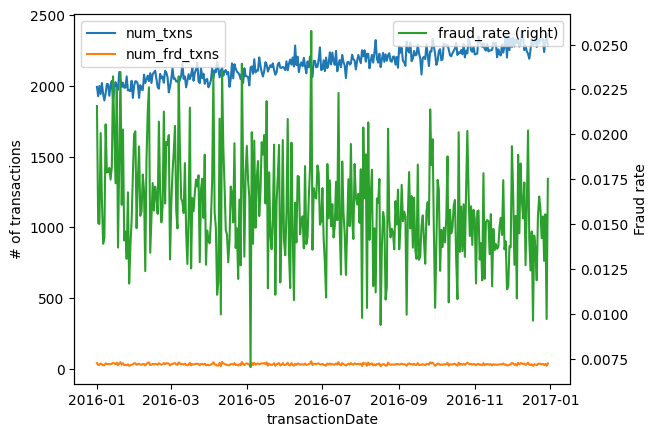

In [83]:
ax = data.groupby("transactionDate").agg(num_txns=("isFraud", "size"), 
                                    num_frd_txns=("isFraud", "sum"),
                                    ).plot()
data.groupby("transactionDate").agg(fraud_rate=("isFraud", "mean")).plot(secondary_y=True, ax=ax)

ax.set_ylabel('# of transactions')
ax.right_ax.set_ylabel('Fraud rate')

h1, l1 = ax.get_legend_handles_labels()
ax.legend(h1, l1, loc=2)
h2, l2 = ax.right_ax.get_legend_handles_labels()
ax.right_ax.legend(h2, l2, loc=1)

# plt.title("# of transactions, # of fraud transactions and fraud rate over time")
plt.show()

### Categorical feature: creditLimit

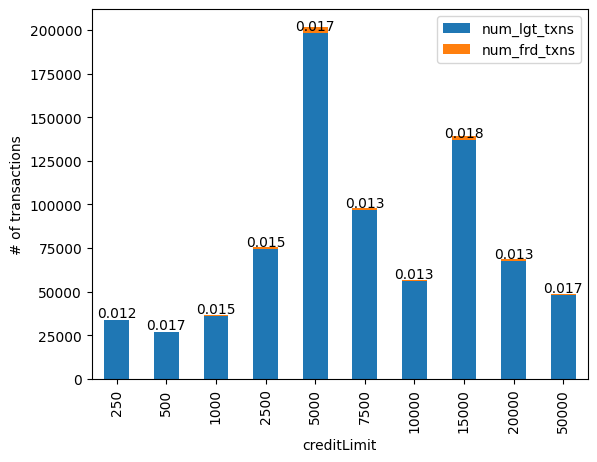

In [84]:
fea = "creditLimit"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events")
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: transactionType

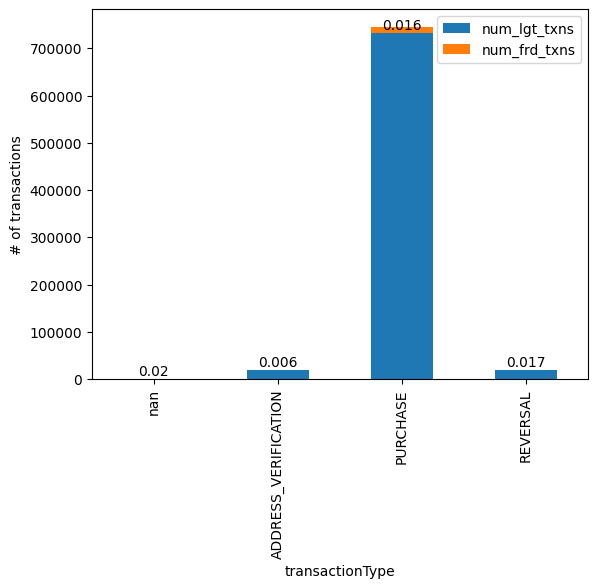

In [85]:
fea = "transactionType"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events")
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: merchantCategoryCode

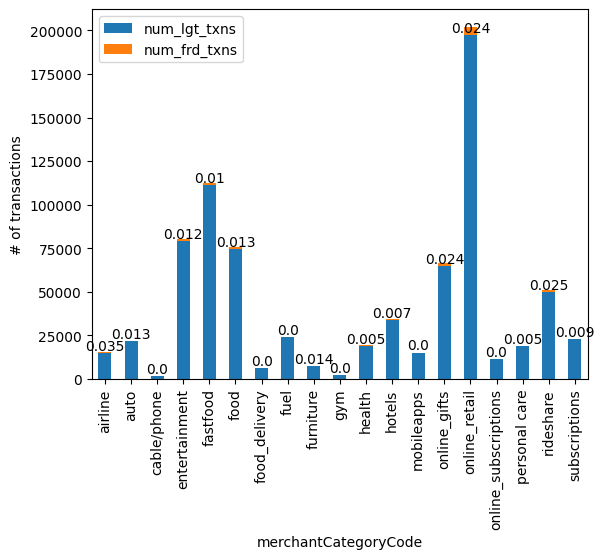

In [86]:
fea = "merchantCategoryCode"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: merchantCountryCode

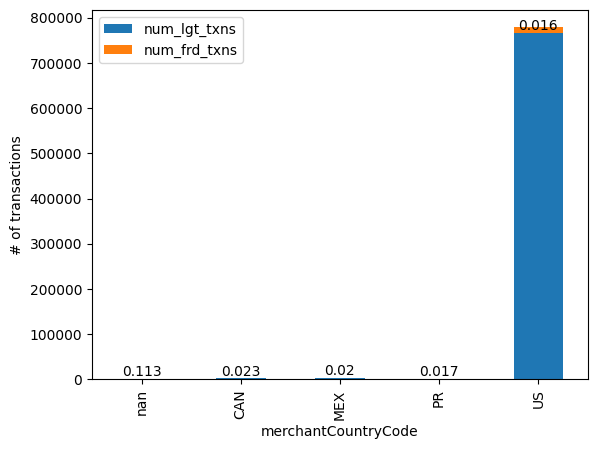

In [87]:
fea = "merchantCountryCode"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: acqCountry

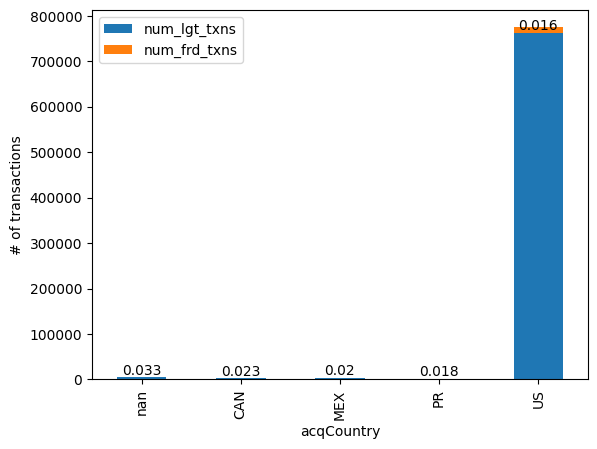

In [88]:
fea = "acqCountry"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

In [89]:
data[data["acqCountry"]==data["merchantCountryCode"]].shape, data[data["acqCountry"]!=data["merchantCountryCode"]].shape

((781731, 23), (4632, 23))

In [90]:
data[data["acqCountry"]==data["merchantCountryCode"]]["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.984307
True     0.015693
Name: proportion, dtype: float64

In [91]:
data[data["acqCountry"]!=data["merchantCountryCode"]]["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.967832
True     0.032168
Name: proportion, dtype: float64

In [92]:
data["countryMismatch"] = data["acqCountry"]!=data["merchantCountryCode"]
data["countryMismatch"].value_counts(dropna=False)

countryMismatch
False    781731
True       4632
Name: count, dtype: int64

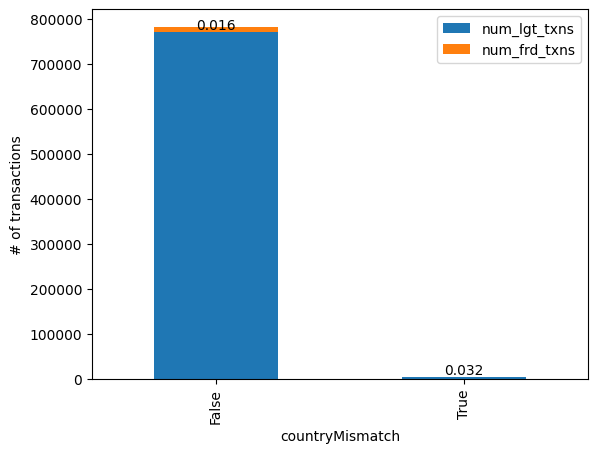

In [93]:
fea = "countryMismatch"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: posEntryMode

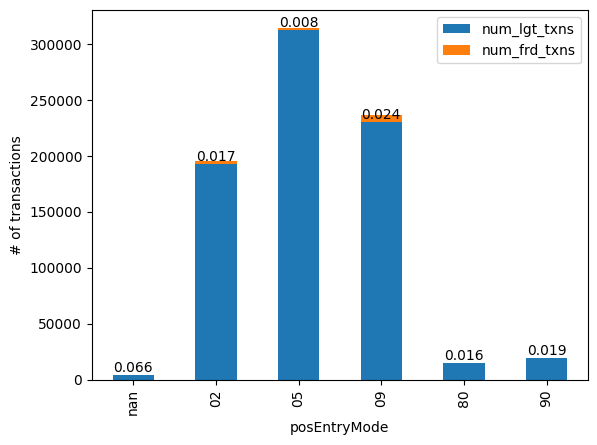

In [94]:
fea = "posEntryMode"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: posConditionCode

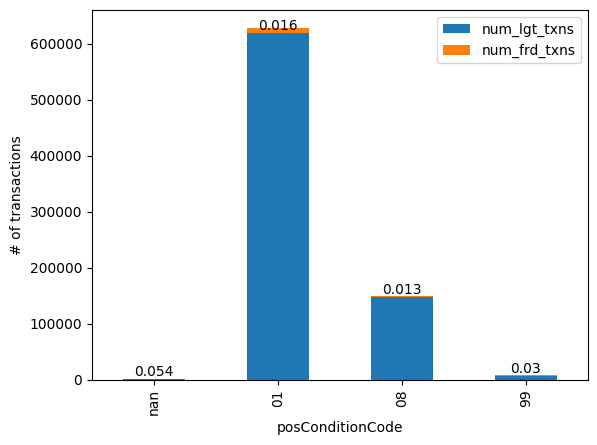

In [95]:
fea = "posConditionCode"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: cardPresent

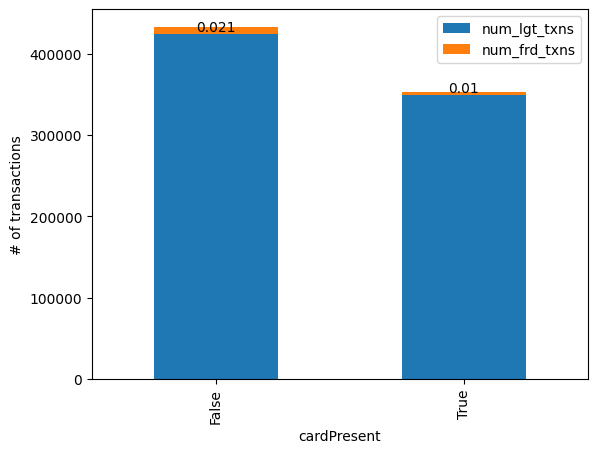

In [96]:
fea = "cardPresent"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: expirationDateKeyInMatch

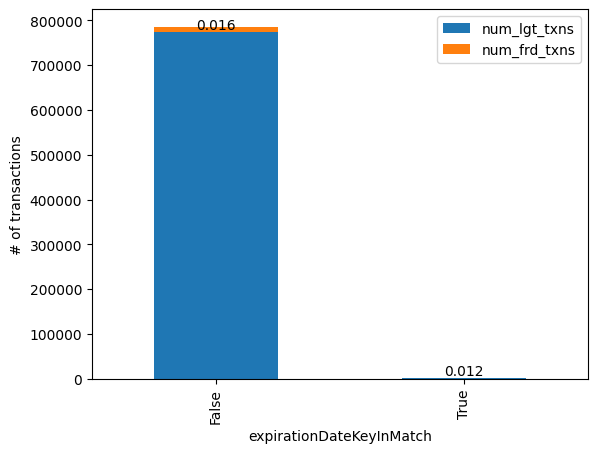

In [97]:
fea = "expirationDateKeyInMatch"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: merchantName

In [98]:
fea = "merchantName"
ans = data[fea].value_counts(dropna=False)
minority = ans[ans<10].index.tolist()
len(minority)

51

In [99]:
data.loc[data[fea].isin(minority),fea] = "<Others>"

In [100]:
data[data[fea].isin(minority)]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch


In [101]:
fea = "merchantName"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ans.sort_values("fraud_rate", ascending=False)

,num_lgt_txns,num_frd_txns,fraud_rate
merchantName,,,
In-N-Out #949129,79.0,10.0,0.112
American Airlines,2844.0,295.0,0.094
In-N-Out #863086,87.0,9.0,0.094
In-N-Out #463194,88.0,8.0,0.083
In-N-Out #422833,101.0,9.0,0.082
...,...,...,...
GreenCook,1673.0,0.0,0.000
Hardee's #08140,91.0,0.0,0.000
Hardee's #114928,98.0,0.0,0.000


#### Categorical features: cardLast4Digits

In [102]:
fea = "cardLast4Digits"
ans = data[fea].value_counts(dropna=False)
minority = ans[ans<10].index.tolist()
len(minority)

733

In [103]:
data.loc[data[fea].isin(minority),fea] = "<Others>"

In [104]:
data[data[fea].isin(minority)]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch


In [105]:
fea = "cardLast4Digits"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ans.sort_values("fraud_rate", ascending=False)

,num_lgt_txns,num_frd_txns,fraud_rate
cardLast4Digits,,,
4548,29.0,18.0,0.383
2109,67.0,32.0,0.323
4427,18.0,7.0,0.280
5672,50.0,17.0,0.254
9916,119.0,36.0,0.232
...,...,...,...
2238,77.0,0.0,0.000
2236,108.0,0.0,0.000
2231,73.0,0.0,0.000


#### Categorical feature: cardCVV

In [106]:
data["cardCVV"].value_counts(dropna=False)

cardCVV
869    33749
289    15509
640    10804
455    10279
959     7024
       ...  
653       33
825       29
183       28
125       23
566       19
Name: count, Length: 899, dtype: int64

In [107]:
fea = "cardCVV"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ans.sort_values("fraud_rate", ascending=False)

,num_lgt_txns,num_frd_txns,fraud_rate
cardCVV,,,
316,853.0,127.0,0.130
513,1026.0,142.0,0.122
363,1563.0,161.0,0.093
658,753.0,76.0,0.092
924,375.0,36.0,0.088
...,...,...,...
826,191.0,0.0,0.000
468,249.0,0.0,0.000
472,310.0,0.0,0.000


#### Categorical feature: enteredCVV

In [108]:
data["enteredCVV"].value_counts(dropna=False)

enteredCVV
869    33424
289    15401
640    10731
455    10176
959     6963
       ...  
70         1
33         1
18         1
93         1
6          1
Name: count, Length: 976, dtype: int64

In [109]:
data["CVVMismatch"] = data["cardCVV"] != data["enteredCVV"]
data["CVVMismatch"].value_counts(dropna=False)

CVVMismatch
False    779348
True       7015
Name: count, dtype: int64

In [110]:
fea = "enteredCVV"
ans = data[fea].value_counts(dropna=False)
minority = ans[ans<10].index.tolist()
len(minority)

75

In [111]:
data.loc[data[fea].isin(minority),fea] = "<Others>"

In [112]:
data[data[fea].isin(minority)]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch


In [113]:
fea = "enteredCVV"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ans.sort_values("fraud_rate", ascending=False)

,num_lgt_txns,num_frd_txns,fraud_rate
enteredCVV,,,
316,854.0,126.0,0.129
513,1024.0,141.0,0.121
658,747.0,76.0,0.092
363,1561.0,158.0,0.092
924,378.0,36.0,0.087
...,...,...,...
472,316.0,0.0,0.000
468,252.0,0.0,0.000
226,307.0,0.0,0.000


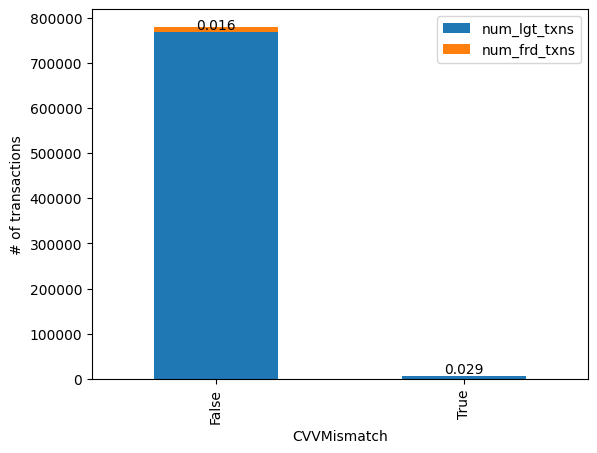

In [114]:
fea = "CVVMismatch"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Categorical feature: currentExpDate

In [115]:
data["currentExpDate"].value_counts(dropna=False)

currentExpDate
03/2029    5103
08/2024    5087
10/2023    5075
05/2027    5063
01/2021    5041
           ... 
02/2033    4276
02/2029    4260
02/2026    4234
12/2019    4028
08/2033    1874
Name: count, Length: 165, dtype: int64

In [116]:
fea = "currentExpDate"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events").fillna(0)
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ans.sort_values("fraud_rate", ascending=False)

,num_lgt_txns,num_frd_txns,fraud_rate
currentExpDate,,,
04/2025,4693,100,0.021
08/2033,1837,37,0.020
04/2033,4718,96,0.020
07/2024,4729,95,0.020
06/2029,4676,89,0.019
...,...,...,...
12/2021,4758,57,0.012
07/2023,4743,57,0.012
02/2022,4366,53,0.012


#### Numerical feature: transactionAmount

In [117]:
data["transactionAmount"].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

array([[<Axes: title={'center': 'lgt_txns'}>,
        <Axes: title={'center': 'frd_txns'}>]], dtype=object)

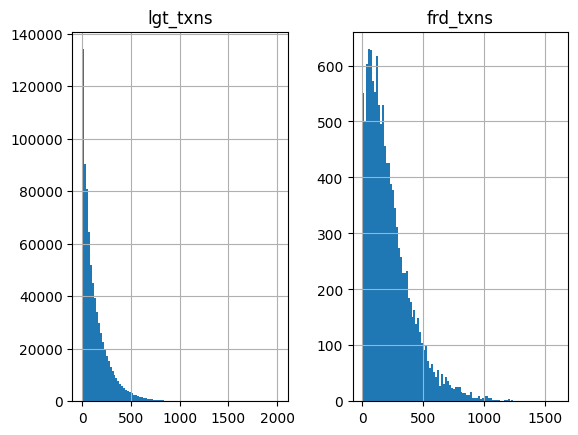

In [118]:
fea = "transactionAmount"
ans = data[[fea, "isFraud"]].pivot(columns="isFraud", values=fea)
ans.columns = ["lgt_txns", "frd_txns"]
ans.hist(bins=100)

<Axes: >

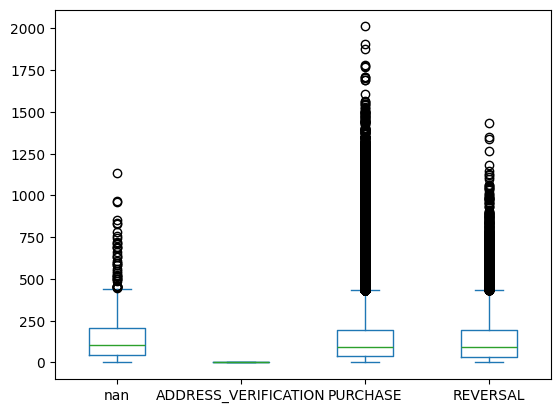

In [119]:
fea = "transactionAmount"
ans = data[[fea, "transactionType"]].pivot(columns="transactionType", values=fea)
ans.plot(kind="box")

In [120]:
data[data["transactionAmount"]<0.01]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch
17,574788567,2500,2428.67,2016-01-26 14:04:22,0.0,Convenient Auto Services,US,US,09,01,auto,08/2025,2015-10-13,2015-10-13,206,206,8522,ADDRESS_VERIFICATION,71.33,False,False,False,2016-01-26,False,False
60,574788567,2500,2500.00,2016-09-02 07:57:44,0.0,Washington Tire,US,US,09,01,auto,04/2027,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,0.00,False,False,False,2016-09-02,False,False
78,574788567,2500,2208.54,2016-10-29 11:01:00,0.0,Fast Tire,US,US,09,08,auto,12/2026,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,291.46,False,False,False,2016-10-29,False,False
102,924729945,50000,50000.00,2016-10-23 14:00:41,0.0,apple.com,US,US,09,08,online_retail,11/2027,2014-07-25,2014-07-25,205,205,9459,ADDRESS_VERIFICATION,0.00,False,False,False,2016-10-23,False,False
116,984504651,50000,48562.35,2016-01-08 19:40:01,0.0,Walgreens #417535,US,US,05,08,health,11/2029,2015-07-27,2015-07-27,640,640,8332,ADDRESS_VERIFICATION,1437.65,False,False,False,2016-01-08,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786035,205026043,5000,3751.09,2016-11-27 18:09:39,0.0,Krispy Kreme #375200,US,US,80,01,fastfood,01/2030,2008-04-15,2008-04-15,359,359,258,ADDRESS_VERIFICATION,1248.91,False,False,False,2016-11-27,False,False
786091,899818521,2500,438.12,2016-04-25 03:35:20,0.0,AMC #145832,US,US,05,01,entertainment,12/2021,2013-06-15,2013-06-15,551,551,5257,ADDRESS_VERIFICATION,2061.88,False,False,False,2016-04-25,False,False
786172,638498773,10000,919.67,2016-07-06 04:07:54,0.0,Dunkin' Donuts #589280,US,US,02,01,fastfood,12/2029,2014-11-17,2014-11-17,175,175,321,ADDRESS_VERIFICATION,9080.33,False,False,False,2016-07-06,False,False
786265,732852505,50000,49688.67,2016-02-16 23:02:52,0.0,Lyft,US,US,05,01,rideshare,08/2022,2012-08-23,2012-08-23,936,536,3783,ADDRESS_VERIFICATION,311.33,False,False,False,2016-02-16,False,True


In [121]:
data[data["transactionAmount"]<0.01]["transactionAmount"].describe()

count    22225.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: transactionAmount, dtype: float64

In [122]:
data[data["transactionAmount"]<0.01]["transactionType"].value_counts(dropna=False)

transactionType
ADDRESS_VERIFICATION    20169
PURCHASE                 1484
REVERSAL                  572
Name: count, dtype: int64

In [123]:
data[data["transactionAmount"]<0.01]["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.994511
True     0.005489
Name: proportion, dtype: float64

In [124]:
data[data["transactionType"]=="ADDRESS_VERIFICATION"]["transactionAmount"].describe()

count    20169.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: transactionAmount, dtype: float64

In [125]:
data[data["transactionType"]=="ADDRESS_VERIFICATION"]["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.994249
True     0.005751
Name: proportion, dtype: float64

#### Numerical feature: availableMoney

In [126]:
all(data["availableMoney"]<=data["creditLimit"])

True

array([[<Axes: title={'center': 'lgt_txns'}>,
        <Axes: title={'center': 'frd_txns'}>]], dtype=object)

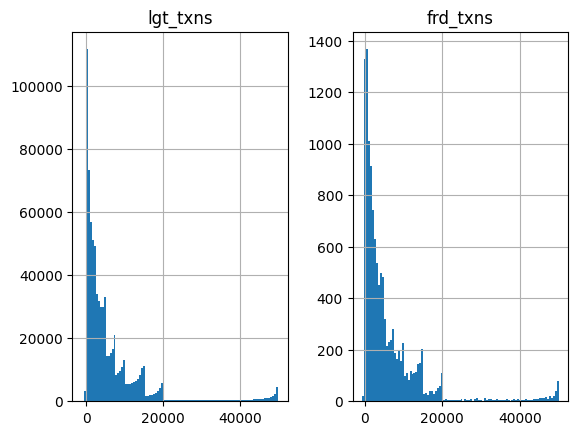

In [127]:
fea = "availableMoney"
ans = data[[fea, "isFraud"]].pivot(columns="isFraud", values=fea)
ans.columns = ["lgt_txns", "frd_txns"]
ans.hist(bins=100)

In [128]:
data["isOverspent"] = data["availableMoney"]<0
data["isOverspent"].value_counts(dropna=False)

isOverspent
False    783432
True       2931
Name: count, dtype: int64

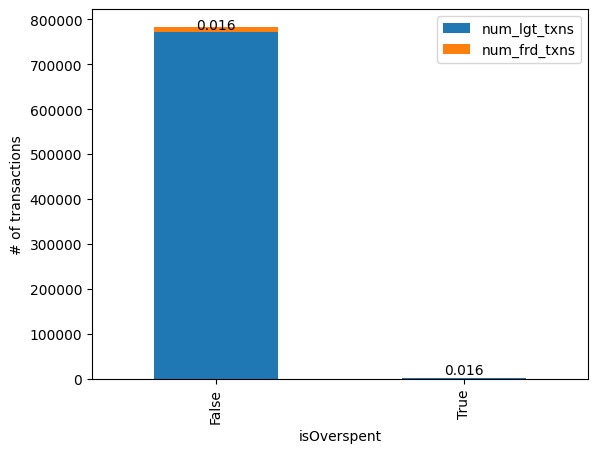

In [129]:
fea = "isOverspent"
ans = (data[[fea, "isFraud"]].groupby([fea, "isFraud"],dropna=False).size().reset_index(name="num_events") \
        .pivot(index=fea, columns="isFraud", values="num_events")
      )
ans.columns = ["num_lgt_txns", "num_frd_txns"]
ax = ans.plot.bar(stacked=True)
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"]+ans["num_lgt_txns"]), 3)
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)
ax.set_ylabel("# of transactions")
plt.show()

#### Numerical feature: currentBalance

In [130]:
all(data["currentBalance"]<=data["creditLimit"]) # can overspend

False

In [131]:
np.allclose(data["currentBalance"]+data["availableMoney"], data["creditLimit"])

True

array([[<Axes: title={'center': 'lgt_txns'}>,
        <Axes: title={'center': 'frd_txns'}>]], dtype=object)

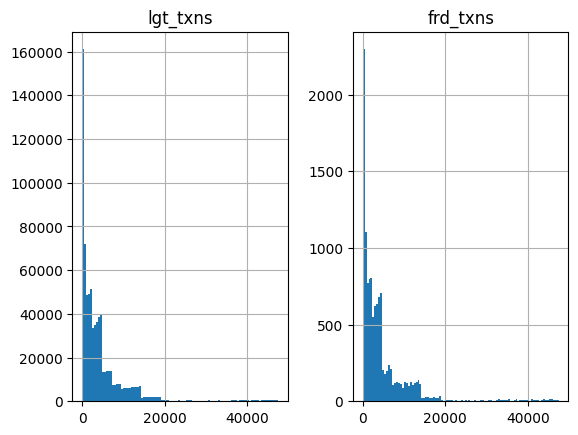

In [132]:
fea = "currentBalance"
ans = data[[fea, "isFraud"]].pivot(columns="isFraud", values=fea)
ans.columns = ["lgt_txns", "frd_txns"]
ans.hist(bins=100)

#### Datetime feature: accountOpenDate, dateOfLastAddressChange

In [133]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent
0,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,<Others>,PURCHASE,0.0,False,False,False,2016-08-13,False,False,False
1,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11,False,False,False
2,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08,False,False,False
3,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10,False,False,False
4,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24,False,False,False


In [134]:
data[["accountOpenDate", "dateOfLastAddressChange", "transactionDate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   accountOpenDate          786363 non-null  object
 1   dateOfLastAddressChange  786363 non-null  object
 2   transactionDate          786363 non-null  object
dtypes: object(3)
memory usage: 18.0+ MB


In [135]:
data["accountOpenDate"] = pd.to_datetime(data["accountOpenDate"], format='%Y-%m-%d')
data["dateOfLastAddressChange"] = pd.to_datetime(data["dateOfLastAddressChange"], format='%Y-%m-%d')
data["transactionDate"] = pd.to_datetime(data["transactionDate"], format='%Y-%m-%d')

data[["accountOpenDate", "dateOfLastAddressChange", "transactionDate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   accountOpenDate          786363 non-null  datetime64[ns]
 1   dateOfLastAddressChange  786363 non-null  datetime64[ns]
 2   transactionDate          786363 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 18.0 MB


In [136]:
data[["accountOpenDate", "dateOfLastAddressChange", "transactionDate"]].head()

,accountOpenDate,dateOfLastAddressChange,transactionDate
0,2015-03-14,2015-03-14,2016-08-13
1,2015-03-14,2015-03-14,2016-10-11
2,2015-03-14,2015-03-14,2016-11-08
3,2015-03-14,2015-03-14,2016-12-10
4,2015-08-06,2015-08-06,2016-03-24


In [137]:
all(data["transactionDate"] >= data["dateOfLastAddressChange"])

True

In [138]:
all(data["dateOfLastAddressChange"] >= data["accountOpenDate"])

True

In [139]:
data["daysSinceLastAddressChange"] = (data["transactionDate"] - data["dateOfLastAddressChange"]).dt.days
data["daysSinceAccountOpen"] = (data["transactionDate"] - data["accountOpenDate"]).dt.days

array([[<Axes: title={'center': 'lgt_txns'}>,
        <Axes: title={'center': 'frd_txns'}>]], dtype=object)

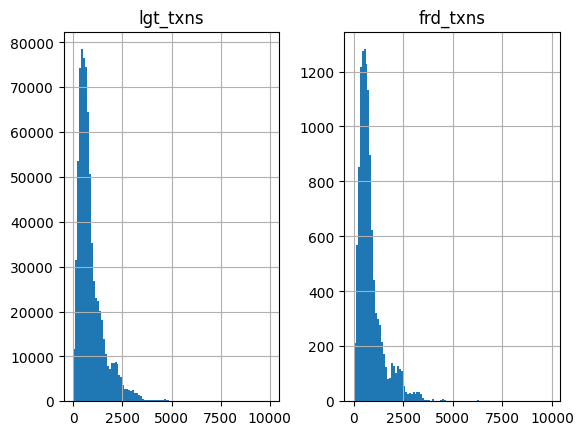

In [140]:
fea = "daysSinceAccountOpen"
ans = data[[fea, "isFraud"]].pivot(columns="isFraud", values=fea)
ans.columns = ["lgt_txns", "frd_txns"]
ans.hist(bins=100)

array([[<Axes: title={'center': 'lgt_txns'}>,
        <Axes: title={'center': 'frd_txns'}>]], dtype=object)

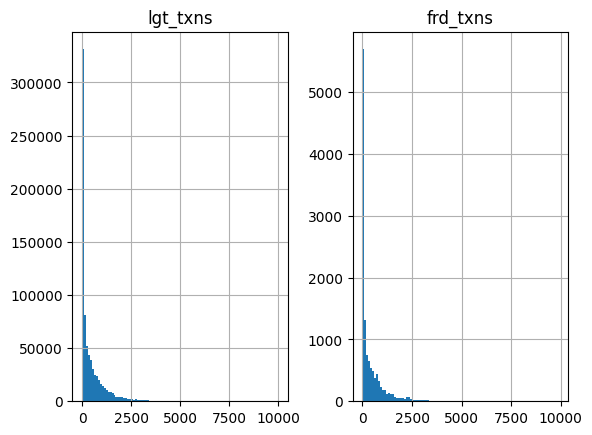

In [141]:
fea = "daysSinceLastAddressChange"
ans = data[[fea, "isFraud"]].pivot(columns="isFraud", values=fea)
ans.columns = ["lgt_txns", "frd_txns"]
ans.hist(bins=100)

### Imputation

In [144]:
data.isna().sum()

customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
currentBalance                   0
cardPresent                      0
expirationDateKeyInMatch         0
isFraud                          0
transactionDate                  0
countryMismatch                  0
CVVMismatch                      0
isOverspent                      0
daysSinceLastAddressChange       0
daysSinceAccountOpen             0
dtype: int64

In [145]:
cat_features = ['customerId', 'creditLimit', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 
        'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'cardPresent',
       'expirationDateKeyInMatch']

In [258]:
joblib.dump(cat_features, "cat_features.joblib")

['cat_features.joblib']

In [146]:
for f in cat_features:
    # print(data[data[f].astype(str).str.contains("<Unknown>")].shape)
    if data[f].isna().sum()>0:
        print(f)
        data[f].fillna("<Unknown>", inplace=True)

acqCountry
merchantCountryCode
posEntryMode
posConditionCode
transactionType


In [147]:
data.isna().sum()

customerId                    0
creditLimit                   0
availableMoney                0
transactionDateTime           0
transactionAmount             0
merchantName                  0
acqCountry                    0
merchantCountryCode           0
posEntryMode                  0
posConditionCode              0
merchantCategoryCode          0
currentExpDate                0
accountOpenDate               0
dateOfLastAddressChange       0
cardCVV                       0
enteredCVV                    0
cardLast4Digits               0
transactionType               0
currentBalance                0
cardPresent                   0
expirationDateKeyInMatch      0
isFraud                       0
transactionDate               0
countryMismatch               0
CVVMismatch                   0
isOverspent                   0
daysSinceLastAddressChange    0
daysSinceAccountOpen          0
dtype: int64

### Historical aggregates

In [148]:
data.shape

(786363, 28)

In [149]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen
0,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,<Others>,PURCHASE,0.0,False,False,False,2016-08-13,False,False,False,518,518
1,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11,False,False,False,577,577
2,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08,False,False,False,605,605
3,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10,False,False,False,637,637
4,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24,False,False,False,231,231


In [150]:
data.to_csv("data_before_aggregates.csv", index=False)

#### Account level aggregates

##### V1

In [159]:
attrs_to_agg = [["customerId"]]
print(len(attrs_to_agg))

1


In [160]:
attrs_to_agg

[['customerId']]

##### V2

In [221]:
attrs_to_agg = [["customerId"]]
for f in cat_features:
    if f not in ["customerId", "cardPresent", "expirationDateKeyInMatch"]:
        attrs_to_agg.append(["customerId", f])
print(len(attrs_to_agg))

13


In [222]:
attrs_to_agg

[['customerId'],
 ['customerId', 'creditLimit'],
 ['customerId', 'merchantName'],
 ['customerId', 'acqCountry'],
 ['customerId', 'merchantCountryCode'],
 ['customerId', 'posEntryMode'],
 ['customerId', 'posConditionCode'],
 ['customerId', 'merchantCategoryCode'],
 ['customerId', 'currentExpDate'],
 ['customerId', 'cardCVV'],
 ['customerId', 'enteredCVV'],
 ['customerId', 'cardLast4Digits'],
 ['customerId', 'transactionType']]

In [223]:
gc.collect()

0

In [235]:
cols_agg_acct = []
for attr in attrs_to_agg:
    print(attr)
    data.sort_values(attr + ["transactionDateTime"], inplace=True)
    data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
    
    first_seen = data.groupby(attr)["transactionDateTime"].first()
    first_seen_dict = first_seen.to_dict()
    if len(attr)==1:
        data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen[r[attr[0]]], axis=1).dt.seconds
    elif len(attr)==2:
        data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
    else:
        raise NotImplementedError
    
    data[f"count_by_{'_'.join(attr)}"] = data.groupby(attr).cumcount()

    data[f"sum_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionAmount"].cumsum() - data["transactionAmount"]

    data[f"avg_by_{'_'.join(attr)}"] = data[f"sum_by_{'_'.join(attr)}"] / data[f"count_by_{'_'.join(attr)}"]

    cols_agg_acct.extend([f"recency_by_{'_'.join(attr)}",
                         f"age_by_{'_'.join(attr)}",
                         f"count_by_{'_'.join(attr)}",
                         f"sum_by_{'_'.join(attr)}",
                         f"avg_by_{'_'.join(attr)}"])

['customerId']
['customerId', 'creditLimit']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"sum_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionAmount"].cumsum() - data["transactionAmount"]
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"avg_by_{'_'.join(attr)}"] = data[f"sum_by_{'_'.join(attr)}"] / data[f"count_by_{'_'.join(attr)}"]


['customerId', 'merchantName']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'acqCountry']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'merchantCountryCode']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'posEntryMode']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'posConditionCode']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'merchantCategoryCode']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'currentExpDate']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'cardCVV']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'enteredCVV']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'cardLast4Digits']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

['customerId', 'transactionType']


/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_32158/3825484697.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen_dict[(r[attr[0]],r[attr[1]])], axis=1).dt.seconds
/var/folders/5g/8_7mzzxs1wj21pgy83m

In [236]:
cols_agg_acct

['recency_by_customerId',
 'age_by_customerId',
 'count_by_customerId',
 'sum_by_customerId',
 'avg_by_customerId',
 'recency_by_customerId_creditLimit',
 'age_by_customerId_creditLimit',
 'count_by_customerId_creditLimit',
 'sum_by_customerId_creditLimit',
 'avg_by_customerId_creditLimit',
 'recency_by_customerId_merchantName',
 'age_by_customerId_merchantName',
 'count_by_customerId_merchantName',
 'sum_by_customerId_merchantName',
 'avg_by_customerId_merchantName',
 'recency_by_customerId_acqCountry',
 'age_by_customerId_acqCountry',
 'count_by_customerId_acqCountry',
 'sum_by_customerId_acqCountry',
 'avg_by_customerId_acqCountry',
 'recency_by_customerId_merchantCountryCode',
 'age_by_customerId_merchantCountryCode',
 'count_by_customerId_merchantCountryCode',
 'sum_by_customerId_merchantCountryCode',
 'avg_by_customerId_merchantCountryCode',
 'recency_by_customerId_posEntryMode',
 'age_by_customerId_posEntryMode',
 'count_by_customerId_posEntryMode',
 'sum_by_customerId_posEntryM

In [239]:
# joblib.dump(cols_agg_acct, "cols_agg_acct.jobblib")
joblib.dump(cols_agg_acct, "cols_agg_acct_v2.jobblib")

['cols_agg_acct_v2.jobblib']

In [237]:
data.shape

(786363, 163)

In [238]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

#### Global aggregates

In [169]:
attrs_to_agg = []
for f in cat_features:
    if f != "customerId":
        attrs_to_agg.append([f])
print(len(attrs_to_agg))

14


In [170]:
attrs_to_agg

[['creditLimit'],
 ['merchantName'],
 ['acqCountry'],
 ['merchantCountryCode'],
 ['posEntryMode'],
 ['posConditionCode'],
 ['merchantCategoryCode'],
 ['currentExpDate'],
 ['cardCVV'],
 ['enteredCVV'],
 ['cardLast4Digits'],
 ['transactionType'],
 ['cardPresent'],
 ['expirationDateKeyInMatch']]

In [171]:
cols_agg_glb = []
for attr in attrs_to_agg:
    print(attr)
    data.sort_values(attr + ["transactionDateTime"], inplace=True)
    data[f"recency_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionDateTime"].diff().dt.seconds
    
    first_seen = data.groupby(attr)["transactionDateTime"].first()
    if len(attr)==1:
        data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen[r[attr[0]]], axis=1).dt.seconds
    elif len(attr)==2:
        data[f"age_by_{'_'.join(attr)}"] = data.apply(lambda r:r["transactionDateTime"] - first_seen[r[attr[0]]][r[[attr[1]]]], axis=1).dt.seconds
    else:
        raise NotImplementedError
    
    data[f"count_by_{'_'.join(attr)}"] = data.groupby(attr).cumcount()

    data[f"sum_by_{'_'.join(attr)}"] = data.groupby(attr)["transactionAmount"].cumsum() - data["transactionAmount"]

    data[f"avg_by_{'_'.join(attr)}"] = data[f"sum_by_{'_'.join(attr)}"] / data[f"count_by_{'_'.join(attr)}"]

    cols_agg_glb.extend([f"recency_by_{'_'.join(attr)}",
                         f"age_by_{'_'.join(attr)}",
                         f"count_by_{'_'.join(attr)}",
                         f"sum_by_{'_'.join(attr)}",
                         f"avg_by_{'_'.join(attr)}"])

['creditLimit']
['merchantName']
['acqCountry']
['merchantCountryCode']
['posEntryMode']
['posConditionCode']
['merchantCategoryCode']
['currentExpDate']
['cardCVV']
['enteredCVV']
['cardLast4Digits']
['transactionType']
['cardPresent']
['expirationDateKeyInMatch']


In [172]:
print(len(cols_agg_glb))
cols_agg_glb

70


['recency_by_creditLimit',
 'age_by_creditLimit',
 'count_by_creditLimit',
 'sum_by_creditLimit',
 'avg_by_creditLimit',
 'recency_by_merchantName',
 'age_by_merchantName',
 'count_by_merchantName',
 'sum_by_merchantName',
 'avg_by_merchantName',
 'recency_by_acqCountry',
 'age_by_acqCountry',
 'count_by_acqCountry',
 'sum_by_acqCountry',
 'avg_by_acqCountry',
 'recency_by_merchantCountryCode',
 'age_by_merchantCountryCode',
 'count_by_merchantCountryCode',
 'sum_by_merchantCountryCode',
 'avg_by_merchantCountryCode',
 'recency_by_posEntryMode',
 'age_by_posEntryMode',
 'count_by_posEntryMode',
 'sum_by_posEntryMode',
 'avg_by_posEntryMode',
 'recency_by_posConditionCode',
 'age_by_posConditionCode',
 'count_by_posConditionCode',
 'sum_by_posConditionCode',
 'avg_by_posConditionCode',
 'recency_by_merchantCategoryCode',
 'age_by_merchantCategoryCode',
 'count_by_merchantCategoryCode',
 'sum_by_merchantCategoryCode',
 'avg_by_merchantCategoryCode',
 'recency_by_currentExpDate',
 'age_by

In [ ]:
joblib.dump(cols_agg_glb, "cols_agg_glb.joblib")

In [255]:
data.shape

(786363, 163)

In [256]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [257]:
# data.to_csv("data_after_aggregates.csv", index=False)
data.to_csv("data_after_aggregates_v2.csv", index=False)

In [183]:
features_basic = ['customerId', 'creditLimit', 'availableMoney', 
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 
        'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch',
       'daysSinceLastAddressChange', 'daysSinceAccountOpen', 
        'countryMismatch', 'CVVMismatch', 'isOverspent']

In [184]:
len(features_basic)

23

In [188]:
joblib.dump(features_basic, "features_basic.joblib")

['features_basic.joblib']

In [203]:
[c for c in cols_agg_glb if not ("cardPresent" in c or "expirationDateKeyInMatch" in c)]

['recency_by_creditLimit',
 'age_by_creditLimit',
 'count_by_creditLimit',
 'sum_by_creditLimit',
 'avg_by_creditLimit',
 'recency_by_merchantName',
 'age_by_merchantName',
 'count_by_merchantName',
 'sum_by_merchantName',
 'avg_by_merchantName',
 'recency_by_acqCountry',
 'age_by_acqCountry',
 'count_by_acqCountry',
 'sum_by_acqCountry',
 'avg_by_acqCountry',
 'recency_by_merchantCountryCode',
 'age_by_merchantCountryCode',
 'count_by_merchantCountryCode',
 'sum_by_merchantCountryCode',
 'avg_by_merchantCountryCode',
 'recency_by_posEntryMode',
 'age_by_posEntryMode',
 'count_by_posEntryMode',
 'sum_by_posEntryMode',
 'avg_by_posEntryMode',
 'recency_by_posConditionCode',
 'age_by_posConditionCode',
 'count_by_posConditionCode',
 'sum_by_posConditionCode',
 'avg_by_posConditionCode',
 'recency_by_merchantCategoryCode',
 'age_by_merchantCategoryCode',
 'count_by_merchantCategoryCode',
 'sum_by_merchantCategoryCode',
 'avg_by_merchantCategoryCode',
 'recency_by_currentExpDate',
 'age_by

In [240]:
features = features_basic + cols_agg_acct + \
            [c for c in cols_agg_glb if not ("cardPresent" in c or "expirationDateKeyInMatch" in c)]
len(features)

148

In [241]:
data[data.duplicated(subset=["transactionDateTime", "customerId", "currentBalance"], keep=False)]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [259]:
data.sort_values(["transactionDateTime", "customerId", "currentBalance"], inplace=True)
data["transactionDateTime"].is_monotonic_increasing

True

In [260]:
data.shape

(786363, 163)

In [261]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [245]:
test_size = int(data.shape[0] * 0.1)
test_size

78636

In [246]:
from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(max_train_size=100_000, test_size=10_000) # quick testing
# tscv = TimeSeriesSplit(max_train_size=3*test_size, test_size=test_size) # limit train size
tscv = TimeSeriesSplit(test_size=test_size)

assert data["transactionDateTime"].is_monotonic_increasing

for i, (train_index, test_index) in enumerate(tscv.split(data)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}  size={len(train_index)}")
    print(f"  Test:  index={test_index}  size={len(test_index)}")

Fold 0:
  Train: index=[     0      1      2 ... 393180 393181 393182]  size=393183
  Test:  index=[393183 393184 393185 ... 471816 471817 471818]  size=78636
Fold 1:
  Train: index=[     0      1      2 ... 471816 471817 471818]  size=471819
  Test:  index=[471819 471820 471821 ... 550452 550453 550454]  size=78636
Fold 2:
  Train: index=[     0      1      2 ... 550452 550453 550454]  size=550455
  Test:  index=[550455 550456 550457 ... 629088 629089 629090]  size=78636
Fold 3:
  Train: index=[     0      1      2 ... 629088 629089 629090]  size=629091
  Test:  index=[629091 629092 629093 ... 707724 707725 707726]  size=78636
Fold 4:
  Train: index=[     0      1      2 ... 707724 707725 707726]  size=707727
  Test:  index=[707727 707728 707729 ... 786360 786361 786362]  size=78636


In [247]:
gc.collect()

0

In [248]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score

verbose=True

res_lst = []
assert data["transactionDateTime"].is_monotonic_increasing
for i, (train_index, test_index) in enumerate(tscv.split(data)):
    if i < 4:
        continue
    
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}  size={len(train_index)}")
    print(f"  Test:  index={test_index}  size={len(test_index)}")

    df_train = data.iloc[train_index,:]
    df_test = data.iloc[test_index,:]
    assert df_train["transactionDateTime"].max() <= df_test["transactionDateTime"].min() 

    random_seed = i
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=random_seed)

    df_train_frd = df_train[df_train["isFraud"]==True]
    df_train_lgt = df_train[df_train["isFraud"]==False]
    df_train_lgt = df_train_lgt.sample(n=df_train_frd.shape[0]*19, random_state=random_seed) # to make fraud rate 5%

    df_train = pd.concat([df_train_frd, df_train_lgt])
    df_train = df_train.sample(frac=1.0, random_state=random_seed)

    X_train, y_train = df_train[features], df_train["isFraud"]
    X_val, y_val = df_val[features], df_val["isFraud"]
    X_test, y_test = df_test[features], df_test["isFraud"]

    # random_seed = i
    # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)

    print(X_train.shape, X_val.shape, X_test.shape)

    pool_train = Pool(X_train, y_train, cat_features=cat_features)
    pool_val = Pool(X_val, y_val, cat_features=cat_features)
    pool_test = Pool(X_test, y_test, cat_features=cat_features)

    cb_reg = CatBoostClassifier(
                            # one_hot_max_size=10,
                            # iterations=6000,
                            # learning_rate=0.03,
                            # early_stopping_rounds=50,
                            custom_metric=["AUC"],
                            random_state=random_seed, 
                            verbose=verbose)
    cb_reg.fit(pool_train, eval_set=pool_val)

    best_score_train = cb_reg.get_best_score()

    best_iteration_train = cb_reg.get_best_iteration()

    cb_preds = cb_reg.predict_proba(pool_test)[:,1]
    roc_auc = roc_auc_score(y_test, cb_preds)

    shap = cb_reg.get_feature_importance(pool_test, type="ShapValues")
    df_shap = pd.DataFrame(shap[:,:-1], columns=cb_reg.feature_names_)
    fea_imp = df_shap.abs().mean().sort_values(ascending=False)

    res = {"roc_auc": roc_auc,
           "best_score_train": best_score_train,
           "best_iteration_train": best_iteration_train,
           "random_seed": random_seed,
           "fea_imp": fea_imp,
           "X_test": X_test,
           "y_test": y_test,
           "y_pred": cb_preds,
           "model": cb_reg
          }
    res_lst.append(res)

Fold 4:
  Train: index=[     0      1      2 ... 707724 707725 707726]  size=707727
  Test:  index=[707727 707728 707729 ... 786360 786361 786362]  size=78636
(179240, 148) (141546, 148) (78636, 148)
Learning rate set to 0.114158
0:	learn: 0.5542101	test: 0.5429370	best: 0.5429370 (0)	total: 1.1s	remaining: 18m 23s
1:	learn: 0.4507099	test: 0.4296603	best: 0.4296603 (1)	total: 1.47s	remaining: 12m 11s
2:	learn: 0.3791372	test: 0.3494258	best: 0.3494258 (2)	total: 1.75s	remaining: 9m 43s
3:	learn: 0.3221343	test: 0.2852328	best: 0.2852328 (3)	total: 2.02s	remaining: 8m 23s
4:	learn: 0.2881960	test: 0.2446471	best: 0.2446471 (4)	total: 2.18s	remaining: 7m 13s
5:	learn: 0.2631158	test: 0.2136955	best: 0.2136955 (5)	total: 2.57s	remaining: 7m 6s
6:	learn: 0.2433071	test: 0.1888340	best: 0.1888340 (6)	total: 2.85s	remaining: 6m 44s
7:	learn: 0.2275857	test: 0.1689425	best: 0.1689425 (7)	total: 3.12s	remaining: 6m 27s
8:	learn: 0.2159833	test: 0.1538294	best: 0.1538294 (8)	total: 3.44s	remai

In [249]:
df_train["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.95
True     0.05
Name: proportion, dtype: float64

In [250]:
roc_auc_lst = [res["roc_auc"] for res in res_lst]
np.mean(roc_auc_lst), np.std(roc_auc_lst)

(0.8885648524569947, 0.0)

In [251]:
roc_auc_lst

[0.8885648524569947]

In [252]:
data["transactionDateTime"].is_monotonic_increasing

True

In [253]:
res

{'roc_auc': 0.8885648524569947,
 'best_score_train': {'learn': {'Logloss': 0.10399417099628931},
  'validation': {'Logloss': 0.06352323728319556, 'AUC': 0.8972120634335344}},
 'best_iteration_train': 990,
 'random_seed': 4,
 'fea_imp': transactionAmount                0.635655
 posEntryMode                     0.455212
 merchantCategoryCode             0.287334
 customerId                       0.237357
 merchantName                     0.227169
                                    ...   
 sum_by_merchantCountryCode       0.001068
 avg_by_customerId_creditLimit    0.000390
 countryMismatch                  0.000337
 expirationDateKeyInMatch         0.000193
 isOverspent                      0.000000
 Length: 148, dtype: float64,
 'X_test':         customerId  creditLimit  availableMoney  transactionAmount  \
 432046   419709514         5000         1561.11             116.78   
 750358   405648828         7500          531.04             115.68   
 549037   307632490         1000       

In [254]:
X_train

,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,daysSinceAccountOpen,countryMismatch,CVVMismatch,isOverspent,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digits,recency_by_customerId_transactionType,age_by_customerId_transactionType,count_by_customerId_transactionType,sum_by_customerId_transactionType,avg_by_customerId_transactionType,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType
766629,484287072,5000,4272.85,26.72,In-N-Out #162055,US,US,02,01,fastfood,05/2027,744,744,7568,PURCHASE,727.15,True,False,199,199,False,False,False,45976.0,44114,60,7236.39